<a href="https://colab.research.google.com/github/Dimas21S/Housing-Price-Clustering-KMeans/blob/main/Terbaru_dari_Yang_Terbaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
uploaded = files.upload()

Saving dataset_rumah.csv to dataset_rumah (3).csv


In [ ]:
df = pd.read_csv('dataset_rumah.csv', encoding="cp1252")

In [ ]:
df.head()
print("")
df.dtypes

,0
nav-link href,object
listing-location,object
price,object
bed,float64
bath,float64
listing-floorarea,object
listing-floorarea 2,object


In [ ]:
df.describe()

,bed,bath
count,29282.000000,29215.000000
mean,3.754457,2.986137
std,1.356762,1.359788
min,1.000000,1.000000
25%,3.000000,2.000000
50%,4.000000,3.000000
75%,4.000000,4.000000
max,10.000000,10.000000


In [ ]:
df.isnull().sum()

,0
nav-link href,0
listing-location,0
price,0
bed,138
bath,205
listing-floorarea,0
listing-floorarea 2,37


In [ ]:
df.duplicated().sum()

df[df.duplicated()]


,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
20,https://www.rumah.com/listing-properti/dijual-...,"Jl Gading Serpong, Gading Serpong, Tangerang S...",950 jt,2.0,1.0,60 m²,Rp 10.555.556 per m²
160,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","6,35 M",5.0,3.0,320 m²,Rp 24.901.961 per m²
260,https://www.rumah.com/listing-properti/dijual-...,"Jl. Bratasena V No.10, Pamulang, Tangerang Sel...",590 jt,2.0,1.0,40 m²,Rp 9.833.333 per m²
261,https://www.rumah.com/listing-properti/dijual-...,"Pamulang, Tangerang Selatan, Banten","2,7 M",4.0,3.0,296 m²,Rp 8.881.579 per m²
262,https://www.rumah.com/listing-properti/dijual-...,"Jl.Lkr Bumi Botanika Utara, Serpong, Tangerang...","6,38700656 M",4.0,4.0,248 m²,Rp 35.483.370 per m²
...,...,...,...,...,...,...,...
28820,https://www.rumah.com/listing-properti/dijual-...,"BSD, Tangerang Selatan, Banten","6,8 M",5.0,4.0,290 m²,Rp 17.042.607 per m²
28840,https://www.rumah.com/listing-properti/dijual-...,"Bintaro Sektor 9, Bintaro, Tangerang Selatan, ...","2,85 M",4.0,3.0,149 m²,Rp 23.949.580 per m²
28940,https://www.rumah.com/listing-properti/dijual-...,"Ceger, Pondok Aren, Bintaro, Tangerang Selatan...","1,4 M",3.0,1.0,70 m²,Rp 10.447.761 per m²
29020,https://www.rumah.com/listing-properti/dijual-...,"Jl. Sutera Feronia 2, Alam Sutera, Tangerang S...","4,9 M",5.0,4.0,300 m²,Rp 20.851.064 per m²


In [ ]:
df[df.duplicated(subset=['bed', 'bath', 'listing-location', 'price', 'listing-floorarea', 'listing-floorarea 2'])]

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
7,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
20,https://www.rumah.com/listing-properti/dijual-...,"Jl Gading Serpong, Gading Serpong, Tangerang S...",950 jt,2.0,1.0,60 m²,Rp 10.555.556 per m²
49,https://www.rumah.com/listing-properti/dijual-...,"Pondok Benda, Pamulang, Tangerang Selatan, Banten",535 jt,2.0,1.0,38 m²,Rp 8.916.667 per m²
50,https://www.rumah.com/listing-properti/dijual-...,"Pondok Benda, Pamulang, Tangerang Selatan, Banten",535 jt,2.0,1.0,38 m²,Rp 8.916.667 per m²
72,https://www.rumah.com/listing-properti/dijual-...,"Serpong, Serpong, Tangerang Selatan, Banten",500 jt,3.0,2.0,55 m²,Rp 8.333.333 per m²
...,...,...,...,...,...,...,...
29400,https://www.rumah.com/listing-properti/dijual-...,"Pondok Aren, Tangerang Selatan, Banten","1,9 M",10.0,10.0,186 m²,Rp 16.379.310 per m²
29407,https://www.rumah.com/listing-properti/dijual-...,"Pondok Aren, Tangerang Selatan, Banten","1,9 M",10.0,10.0,186 m²,Rp 16.379.310 per m²
29409,https://www.rumah.com/listing-properti/dijual-...,"Alam Sutera, Tangerang Selatan, Banten","5,9 M",6.0,5.0,280 m²,Rp 24.583.333 per m²
29410,https://www.rumah.com/listing-properti/dijual-...,"Alam Sutera, Tangerang Selatan, Banten","2,29 M",4.0,4.0,120 m²,Rp 28.625.000 per m²


In [ ]:
print("Sebelum:", len(df))
df = df.drop_duplicates()
print("Sesudah:", len(df))


Sebelum: 29420
Sesudah: 24179


In [ ]:
df = df.dropna()

print(df.isnull().sum())

nav-link href          0
listing-location       0
price                  0
bed                    0
bath                   0
listing-floorarea      0
listing-floorarea 2    0
dtype: int64


In [ ]:
def cleanse_number(text):
  return re.sub(r'[^0-9]', '', str(text))

In [ ]:
df["Harga per meter-2"] = df["listing-floorarea 2"].apply(cleanse_number)


In [ ]:
df.dtypes

,0
nav-link href,object
listing-location,object
price,object
bed,float64
bath,float64
listing-floorarea,object
listing-floorarea 2,object
Harga per meter-2,object


In [ ]:
df["Luas tanah"] = df["listing-floorarea"].apply(cleanse_number)

In [ ]:
def parse_price(value):
    if pd.isna(value):
        return None
    value = value.replace("Rp", "").replace(" ", "").replace(",", ".")

    match = re.findall(r"[\d\.]+", value)
    if len(match) == 2:
        avg_value = (float(match[0]) + float(match[1])) / 2
    else:
        avg_value = float(match[0])

    if "M" in value:
        return avg_value * 1_000_000_000
    elif "Jt" in value or "JT" in value or "jt" in value:
        return avg_value * 1_000_000
    else:
        return avg_value

df["Harga"] = df["price"].apply(parse_price)
df.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2,Harga per meter-2,Luas tanah,Harga
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²,20720721,420,6.900000e+09
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²,12747875,190,4.500000e+09
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²,30859375,132,3.950000e+09
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²,18333333,220,3.300000e+09
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²,27777778,180,3.500000e+09


In [ ]:
df.dtypes

,0
nav-link href,object
listing-location,object
price,object
bed,float64
bath,float64
listing-floorarea,object
listing-floorarea 2,object
Harga per meter-2,object
Luas tanah,object
Harga,float64


In [ ]:
df["Luas tanah"] = df["Luas tanah"].astype(float)

In [ ]:
df["Harga per meter-2"] = df["Harga per meter-2"].astype(float)

In [ ]:
df.dtypes

,0
nav-link href,object
listing-location,object
price,object
bed,float64
bath,float64
listing-floorarea,object
listing-floorarea 2,object
Harga per meter-2,float64
Luas tanah,float64
Harga,float64


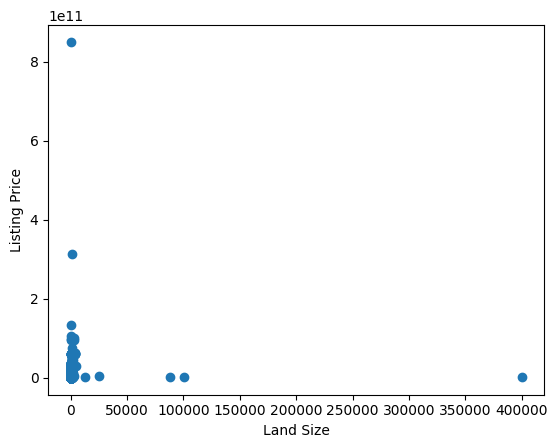

In [ ]:
plt.scatter(df['Luas tanah'], df['Harga'])
plt.xlabel('Land Size')
plt.ylabel('Listing Price')
plt.show()

In [ ]:
df["Harga"].describe()

,Harga
count,2.398400e+04
mean,3.587992e+09
std,7.244201e+09
min,1.000000e+00
25%,1.350000e+09
50%,2.500000e+09
75%,4.350000e+09
max,8.500000e+11


In [ ]:
df["Luas tanah"].describe()

,Luas tanah
count,23984.000000
mean,211.148140
std,2732.318555
min,1.000000
25%,80.000000
50%,140.000000
75%,235.000000
max,400000.000000


In [ ]:
df["Harga per meter-2"].describe()


,Harga per meter-2
count,2.398400e+04
mean,3.316537e+07
std,5.304427e+08
min,0.000000e+00
25%,1.326531e+07
50%,1.840278e+07
75%,2.428571e+07
max,2.937500e+10


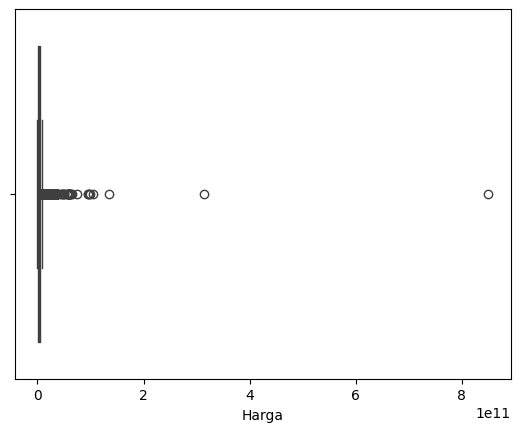

In [ ]:
sns.boxplot(x=df["Harga"])
plt.show()

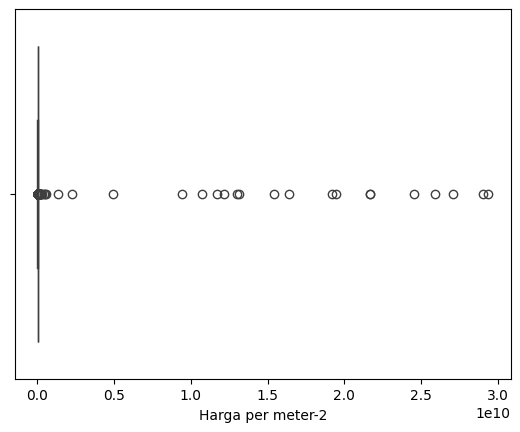

In [ ]:
sns.boxplot(x=df["Harga per meter-2"])
plt.show()

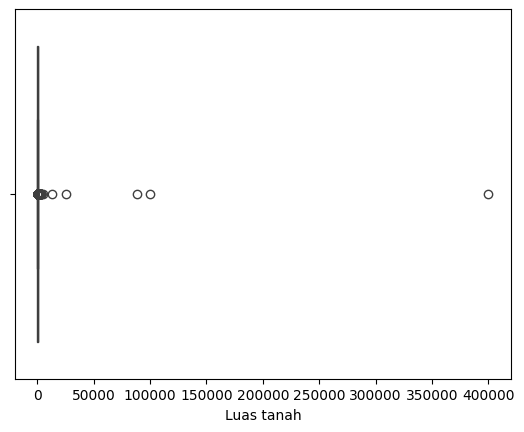

In [ ]:
sns.boxplot(x=df["Luas tanah"])
plt.show()

In [ ]:
df.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2,Harga per meter-2,Luas tanah,Harga
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²,20720721.0,420.0,6.900000e+09
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²,12747875.0,190.0,4.500000e+09
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²,30859375.0,132.0,3.950000e+09
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²,18333333.0,220.0,3.300000e+09
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²,27777778.0,180.0,3.500000e+09


In [ ]:
df = df[df["Luas tanah"] <= 800]

In [ ]:
df = df[df["Harga"] <= 19_900_000_000]

In [ ]:
df["Luas tanah"].describe()

,Luas tanah
count,23654.000000
mean,174.922001
std,128.137561
min,1.000000
25%,80.000000
50%,140.000000
75%,229.000000
max,800.000000


In [ ]:
df["Harga"].describe()

,Harga
count,2.365400e+04
mean,3.228932e+09
std,2.801237e+09
min,1.000000e+00
25%,1.350000e+09
50%,2.400007e+09
75%,4.200000e+09
max,1.990000e+10


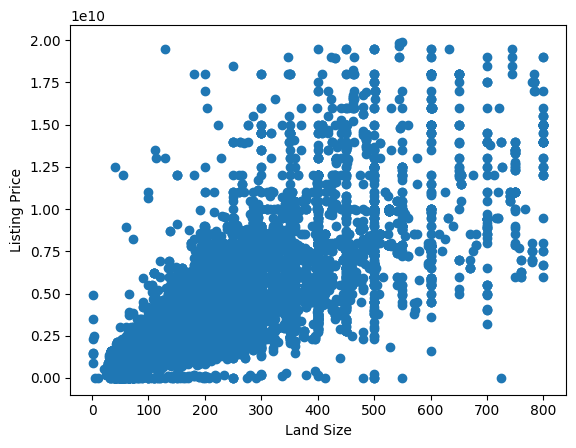

In [ ]:
plt.scatter(df['Luas tanah'], df['Harga'])
plt.xlabel('Land Size')
plt.ylabel('Listing Price')
plt.show()

In [ ]:
x_train = df[['Luas tanah', 'Harga']].values
x_train[:5]

array([[4.20e+02, 6.90e+09],
       [1.90e+02, 4.50e+09],
       [1.32e+02, 3.95e+09],
       [2.20e+02, 3.30e+09],
       [1.80e+02, 3.50e+09]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train[:5]

array([[0.52440551, 0.34673367],
       [0.23654568, 0.22613065],
       [0.16395494, 0.19849246],
       [0.27409262, 0.16582915],
       [0.22403004, 0.1758794 ]])

In [ ]:
inertias = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)
print(inertias[k-1])

89.35479060737764


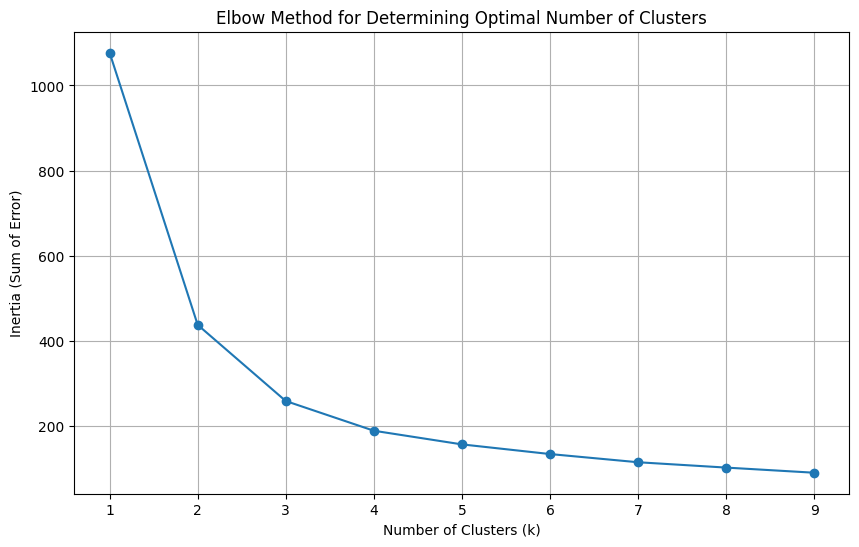

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Error)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [ ]:
y_cluster = kmean.fit_predict(x_train)
y_cluster

array([1, 2, 0, ..., 0, 0, 2], dtype=int32)

In [ ]:
df['cluster'] = y_cluster
df

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2,Harga per meter-2,Luas tanah,Harga,cluster
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²,20720721.0,420.0,6.900000e+09,1
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²,12747875.0,190.0,4.500000e+09,2
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²,30859375.0,132.0,3.950000e+09,0
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²,18333333.0,220.0,3.300000e+09,2
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²,27777778.0,180.0,3.500000e+09,2
...,...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,3 M",3.0,3.0,300 m²,Rp 21.710.526 per m²,21710526.0,300.0,3.300000e+09,2
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4 M,8.0,4.0,330 m²,Rp 36.363.636 per m²,36363636.0,330.0,4.000000e+09,2
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","2,2 M",3.0,2.0,160 m²,Rp 18.333.333 per m²,18333333.0,160.0,2.200000e+09,0
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","1,95 M",3.0,2.0,120 m²,Rp 21.666.667 per m²,21666667.0,120.0,1.950000e+09,0


In [ ]:
kmean.cluster_centers_

array([[0.12108465, 0.08376401],
       [0.61184435, 0.50968005],
       [0.31229885, 0.23260636]])

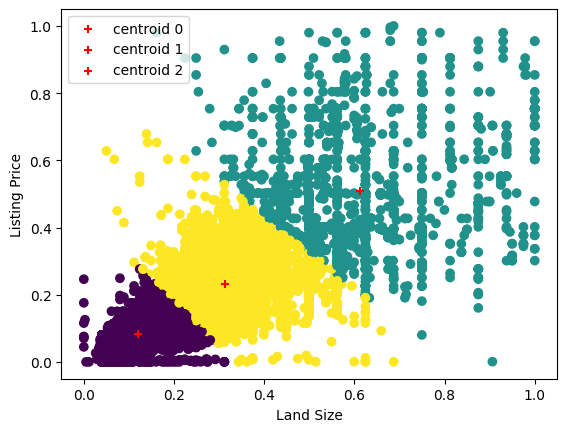

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0, 0], kmean.cluster_centers_[0, 1], c='red', marker='+', label='centroid 0')
plt.scatter(kmean.cluster_centers_[1, 0], kmean.cluster_centers_[1, 1], c='red', marker='+', label='centroid 1')
plt.scatter(kmean.cluster_centers_[2, 0], kmean.cluster_centers_[2, 1], c='red', marker='+', label='centroid 2')
plt.xlabel('Land Size')
plt.ylabel('Listing Price')
plt.legend()
plt.show()